In [1]:
from udntools.utils.pc_theory import rho
import numpy as np
import matplotlib.pyplot as plt
from udntools.region import UsrCenterCompServiceRegion
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from udntools.utils.dim2_distance import dim2_distance
import warnings
warnings.filterwarnings("ignore")

In [2]:
R = np.arange(0.1, 40.6, 0.5)
r = np.arange(0.1, 10.6, 0.5)
r_mesh, R_mesh = np.meshgrid(r, R)
alpha = 4.0
T_db = 5.0

In [3]:
def P_coverage(r, R, T_db):
    T = 10 ** (T_db / 10)
    r_mesh, R_mesh = np.meshgrid(r, R)
    T_real = (r_mesh / R_mesh) ** alpha * T
    rho_value = rho(T_real, alpha)
    P = np.exp(-np.pi * R_mesh ** 2 * 0.01 * rho_value)
    return P

In [4]:
P_0 = P_coverage(r, R, 0)
P_3 = P_coverage(r, R, 3)
P_5 = P_coverage(r, R, 5)

对以用户为中心的基站分簇算法进行仿真，
在理论分析中，我们给出了用户的中断概率
与用户距离服务基站的距离、用户距离最近干扰基站距离的关系。

我们给出了用户所需的信干比为 ~$0\mathrm{dB}$、$3\mathrm{dB}$、$5\mathrm{dB}$~时的情况的数值分析结果，如图所示：

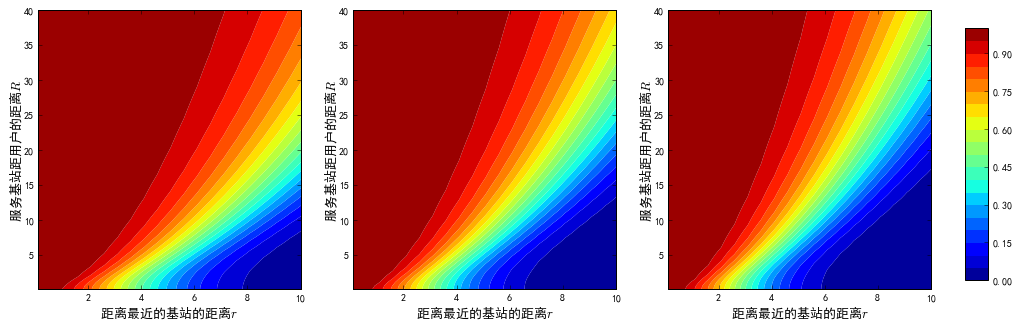

In [5]:
fig = plt.figure(figsize=(16,5))

# 使能中文字体
# -*- coding:utf-8 -*-
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

ax = fig.add_subplot(131)

a = ax.contourf(r_mesh, R_mesh, P_0,
                 np.linspace(0, 1, 21),
                 alpha=1,
                 antialiased=True)

plt.xlim(0.1, 10)
plt.ylim(0.1, 40)

# 加坐标轴标签
# 设置x轴的位置及数据在坐标轴上的位置

label_x = ax.set_xlabel("距离最近的基站的距离$r$",fontproperties = 'SimHei', fontsize = 13)
ax.xaxis.set_label_coords(0.5, -0.05)

label_y = ax.set_ylabel("服务基站距用户的距离$R$",fontproperties = 'SimHei', fontsize = 13)
ax.yaxis.set_label_coords(-0.05, 0.5)

ax = fig.add_subplot(132)

a = ax.contourf(r_mesh, R_mesh, P_3,
                 np.linspace(0, 1, 21),
                 alpha=1,
                 antialiased=True)

plt.xlim(0.1, 10)
plt.ylim(0.1, 40)

# 加坐标轴标签
# 设置x轴的位置及数据在坐标轴上的位置

label_x = ax.set_xlabel("距离最近的基站的距离$r$",fontproperties = 'SimHei', fontsize = 13)
ax.xaxis.set_label_coords(0.5, -0.05)

label_y = ax.set_ylabel("服务基站距用户的距离$R$",fontproperties = 'SimHei', fontsize = 13)
ax.yaxis.set_label_coords(-0.05, 0.5)


ax = fig.add_subplot(133)

a = ax.contourf(r_mesh, R_mesh, P_5,
                 np.linspace(0, 1, 21),
                 alpha=1,
                 antialiased=True)

plt.xlim(0.1, 10)
plt.ylim(0.1, 40)

# 加坐标轴标签
# 设置x轴的位置及数据在坐标轴上的位置

label_x = ax.set_xlabel("距离最近的基站的距离$r$",fontproperties = 'SimHei', fontsize = 13)
ax.xaxis.set_label_coords(0.5, -0.05)

label_y = ax.set_ylabel("服务基站距用户的距离$R$",fontproperties = 'SimHei', fontsize = 13)
ax.yaxis.set_label_coords(-0.05, 0.5)

cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
fig.colorbar(a, cax=cbar_ax)

plt.savefig("P_user_center_show.pdf")   
plt.savefig("P_user_center_show.png")  
plt.show()

假设网络的频谱利用率的需求为~$2 bps / \mathrm{Hz}$，则用户的信干比需求大概为~$5\mathrm{dB}$，因此选取~$5\mathrm{dB}$~作为门限设定的参考指标，选定的距离门限的中断概率的初值设置为~0.35，即可得到以用户为中心的距离门限了：
距离门限与用户的联合半径的门限的设定的曲线可以通过热力图中的等高线得到。

下面生成随机的基站，根据前面做的假设，假设受每个基站处的热点影响的用户有且仅有一个，因此用户数和基站数是相同的，但有可能出现有的微基站覆盖的区域范围内没有用户的情况。

生成的基站和用户如下图所示：

In [6]:
region = UsrCenterCompServiceRegion(0, 100, 0, 100,
                                    100, 1000)

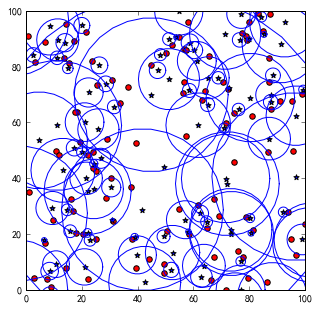

In [7]:
fig =plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

# vor = Voronoi(region.bs_position_)
# voronoi_plot_2d(vor, show_vertices=False, show_points=False, ax=ax)

plt.scatter(region.bs_position_[:,0],
            region.bs_position_[:,1],
            marker='o',
            s=30,
            c='r')

plt.scatter(region.ue_position_now_[0,:],
            region.ue_position_now_[1,:],
            marker='*',
            s=30,
            c='b')

for i in range(region.ue_number_now_):
    atom = np.arange(0, 2 * np.pi * 31 / 30, 2 * np.pi / 30)
    x = (region.ue_position_now_[0, i] 
         + np.cos(atom) * region.ue_radius_[i])
    y = (region.ue_position_now_[1, i]  
         + np.sin(atom) * region.ue_radius_[i])
    plt.plot(x, y, color='b')
    
plt.xlim(region.x_min, region.x_max)
plt.ylim(region.y_min, region.y_max)
plt.show()


算法以用户为中心选择协作基站，

从图中可以看出，与距离服务的微基站的距离越远，接下来本文提出一种以用户为中心的微基站分簇算法。

假设每个基站满载服务，如果一个基站中有多个用户，则采用时分复用的方法对基站内的用户进行服务。

如果基站内有1个以上的用户，则随机选取一个用户

如果基站内没有用户，则判断基站是否有睡眠模式，
如果有睡眠模式，那么就功率置零，
如果没有睡眠模式，那么就功率置P


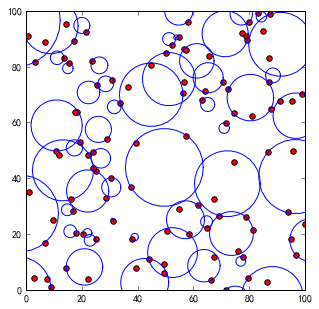

In [10]:
fig =plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

distance = dim2_distance(region.bs_position_, region.ue_position_)

plt.scatter(region.bs_position_[:,0],
            region.bs_position_[:,1],
            marker='o',
            s=30,
            c='r')
'''
plt.scatter(region.ue_position_now_[0,:],
            region.ue_position_now_[1,:],
            marker='*',
            s=30,
            c='b')
'''
for key, values in region.cluster_set_.items():
    atom = np.arange(0, 2 * np.pi * 31 / 30, 2 * np.pi / 30)
    x = (region.ue_position_[0,region.cluster_ue_set_[key][0]]
         + np.cos(atom) * distance[values[-1],
                                   region.cluster_ue_set_[key][0]])
    y = (region.ue_position_[1,region.cluster_ue_set_[key][0]]
         + np.sin(atom) * distance[values[-1],
                                   region.cluster_ue_set_[key][0]])
    plt.plot(x, y, color='b')
    
plt.xlim(region.x_min, region.x_max)
plt.ylim(region.y_min, region.y_max)
plt.show()
    